In [ ]:
import ee
import geemap
import time
import requests
import json
import os
from geemap import geojson_to_ee, ee_to_geojson
from ipyleaflet import GeoJSON
import geopandas as gpd
import topojson as tp
import pandas as pd
import datetime
from pivottablejs import pivot_ui

In [5]:
#ee.Authenticate()
#geemap.ee_search()
ee.Initialize()
Map = geemap.Map()

In [9]:
token='d3WVa9uBFDKvJ0TZcgcVI1HpOP6Pi6TsWBLUerNC0uGpiaWuMqYXbpMExHtJC1mTUS7lsb0iIsfJV-q6USznxd23rrTy0YyHuCaYFvXHkTFAtJpdk9wELq3FZ-ey_wSlJelEBYKHCMgNcej5LoLLbEvmakPrASvcJWU2HKm2k2nv-K6GYu1gzJcoa4i2Tf3gI2FJPzFuY9bg0z330dPSJucV5vIrgGw1Qwzsn8fs85DLyfMQFeVIOFEavoHZsmXP'
r20='https://araucaria.arauco.com/server/rest/services/Hosted/PERIMETROS_INCENDIOS_T2024_EDITABLE/FeatureServer/115/query?where=status+%3D+%271%27+and+not+estado_med+%3D%273%27&objectIds=&time=&geometry=&geometryType=esriGeometryEnvelope&inSR=&spatialRel=esriSpatialRelIntersects&distance=&units=esriSRUnit_Foot&relationParam=&outFields=ficha&returnGeometry=true&maxAllowableOffset=&geometryPrecision=&outSR=&havingClause=&gdbVersion=&historicMoment=&returnDistinctValues=false&returnIdsOnly=false&returnCountOnly=false&returnExtentOnly=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&returnZ=false&returnM=false&multipatchOption=xyFootprint&resultOffset=&resultRecordCount=&returnTrueCurves=false&returnCentroid=false&timeReferenceUnknownClient=false&sqlFormat=none&resultType=&datumTransformation=&lodType=geohash&lod=&lodSR=&f=geojson&token='+token
###token araucaria auth (160323)
perimetro="data/r20.json"

In [10]:
df = gpd.read_file(r20)\
        .to_crs('EPSG:32718')\
        .dissolve(by='ficha')\
        .simplify(tolerance=5)\
        .geometry\
        .to_crs('EPSG:4326')

In [11]:
if os.path.exists(perimetro):
    os.remove(perimetro)
df.to_file(perimetro, driver="GeoJSON")

In [12]:
gdf = gpd.read_file(
    perimetro
)

In [13]:
lst=pd.read_html('https://www.estar.cl/fire/planilla.php')
df2=pd.DataFrame(lst[0],columns=['TEMPORADA',	'INICIO',	'SEMANA INICIO',	'SEMANA KPI',	'ANO INICIO',	'MES INICIO',	'DIA INICIO',	'HORA INICIO',	'COD_SEMANA',	'DIA_SEMANA',	'RANGO_PREV',	'REGION',	'PROVINCIA',	'COMUNA',	'EMPRESA',	'PROPIETARIO',	'TIPO',	'AREA',	'FICHA',	'COD_PREDIO',	'PREDIO',	'FOCOS',	'MULTIFOCO',	'DANO PLANTAC',	'CAUSA',	'CODIGO_CAUSA',	'CONFLICTO',	'GRUPO CAUSAL',	'ZONA META',	'COD META',	'COMBUSTIBLE INICIAL',	'COMBUSTIBLE FINAL',	'DESPACHADOR',	'DETECTOR',	'AVISO',	'COMANDANTE',	'ANCHO LINEA',	'LARGO LINEA',	'CLASE',	'GASTO COMBATE UF',	'FECHA CONTROL',	'HORA CONTROL',	'LONGITUD',	'LATITUD',	'ESTADO',	'SUP INICIAL',	'PIRA',	'EUCA',	'OTRAS',	'TOTAL',	'SUM DANO',	'USD DANO',	'ESTADO DANO',	'DETECCION',	'DESPACHO',	'ARRIBO',	'CONTENCION',	'CONTROL',	'EXTINCION',	'MIN DESPACHO',	'PROM SALIDA',	'MIN ARRIBO',	'PROM INICIO COMBATE',	'MIN CONTENCION',	'MIN CONTROL',	'MIN EXTINCION',	'MIN HASTA CONTENCION',	'MIN TOTAL',	'RECURSOS DESPACHO',	'RECURSOS COMBATE',	'RECURSOS CONTROL',	'ESTIMADO CONTROL',	'AREA CONTROL'])


In [14]:
df_columns=['FICHA','PIRA','EUCA','INICIO','CONTROL']
df2=df2.loc[:,df_columns]


In [15]:
gdf['ficha']=gdf['ficha'].astype(int)

In [16]:
fichas=gdf['ficha'].tolist()

In [22]:
fichas.remove(999)

In [24]:
df_incendio=pd.merge(gdf,df2,left_on=['ficha'],right_on=['FICHA'], how='left')

In [25]:
df_incendio




,ficha,geometry,FICHA,PIRA,EUCA,INICIO,CONTROL
0,999,"MULTIPOLYGON (((-73.06777 -41.45511, -73.06674...",NaN,NaN,NaN,NaN,NaN
1,224011944,"POLYGON ((-72.42615 -36.63048, -72.42642 -36.6...",224011944.0,34870.0,0.0,2024-01-22 15:59:34,2024-01-23 21:00:30
2,224011971,"POLYGON ((-72.91383 -36.86951, -72.91326 -36.8...",224011971.0,162300.0,900.0,2024-01-23 09:39:33,2024-01-24 09:40:28
3,224011981,"POLYGON ((-71.70588 -35.12268, -71.70548 -35.1...",224011981.0,1000.0,0.0,2024-01-23 15:24:42,2024-01-23 16:39:30
4,224012846,"POLYGON ((-71.83976 -35.84575, -71.84197 -35.8...",224012846.0,28000.0,0.0,2024-02-28 22:15:03,2024-02-29 01:30:00
5,224012941,"POLYGON ((-72.71019 -37.82640, -72.70988 -37.8...",224012941.0,52500.0,0.0,2024-03-04 16:31:10,2024-03-04 20:50:00
6,224012954,"POLYGON ((-72.62030 -36.82887, -72.61962 -36.8...",224012954.0,5950.0,0.0,2024-03-05 05:27:32,2024-03-05 07:05:18
7,224013188,"POLYGON ((-72.61941 -36.83072, -72.61980 -36.8...",224013188.0,26000.0,0.0,2024-03-14 22:27:08,2024-03-15 01:20:43


In [27]:
df_incendio.query('ficha >1000')['INICIO'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S') - datetime.timedelta(days=-1)).dt.date

1    2024-01-23
2    2024-01-24
3    2024-01-24
4    2024-02-29
5    2024-03-05
6    2024-03-06
7    2024-03-15
Name: INICIO, dtype: object

In [ ]:
#.to_file('dNBRT2024_caso25marzo.shp')

    gdf2=gdf.query(f'ficha == {i}')
    fc = geemap.geopandas_to_ee(gdf2)
    df3=df2[df2['FICHA'].isin(gdf['ficha'])]
    date_inicio2 = df2.query(f'FICHA == {i}')['INICIO'].tolist()[0], '%Y-%m-%d %H:%M:%S')
    date_control1 = datetime.datetime.strptime(df2.query(f'FICHA == {i}')['CONTROL'].tolist()[0], '%Y-%m-%d %H:%M:%S')
    date_inicio2 =   date_inicio2 - datetime.timedelta(days=-1)
    date_control1 = date_control1 + datetime.timedelta(days=-1)
    date_inicio1 = date_inicio2 - datetime.timedelta(days=36)
    date_control2 = date_control1 + datetime.timedelta(days=36)
    date_inicio1 = date_inicio1.strftime('%Y-%m-%d')
    date_inicio2 = date_inicio2.strftime('%Y-%m-%d')
    date_control1 = date_control1.strftime('%Y-%m-%d')
    date_control2 = date_control2.strftime('%Y-%m-%d')
    prefire_start = f'{date_inicio1}'
    prefire_end = f'{date_inicio2}'

    # Now set the same parameters for AFTER the fire.
    postfire_start = f'{date_control1}'
    #postfire_end = time.strftime('%Y-%m-%d', time.localtime(time.time()))
    postfire_end = f'{date_control2}'

In [28]:
def addNBR(image):
    nbr = image.normalizedDifference(['B8', 'B12']).rename("nbr")
    image = image.addBands(nbr)
    return image

def red2(image):
    red= image.expression('(RED*1.3)',{'RED': image.select('B4') }).rename('B4B')
    image = image.addBands(red)
    return image

def maskS2clouds(image):
  qa = image.select('QA60')

  # Bits 10 and 11 are clouds and cirrus, respectively.
  cloudBitMask = 1 << 10
  cirrusBitMask = 1 << 11

  # Both flags should be set to zero, indicating clear conditions.
  mask = qa.bitwiseAnd(cloudBitMask).eq(0).And(
             qa.bitwiseAnd(cirrusBitMask).eq(0))

  # Return the masked image, scaled to [0, 1].
  return image.updateMask(mask).divide(10000)

# Define a function to simplify the geometries in the feature collection
def simplifyGeom(feature):
  return feature.simplify(tolerance=50)

# Define function to dissolve features based on an attribute name shared across all features (e.g., 'name')
def dissolve_by_attribute(fc, attribute):
    # Create a distinct list of attribute values for the given attribute name
    attributes = fc.distinct(attribute).aggregate_array(attribute)
    # Dissolve the polygons by each attribute value
    dissolved_fc = ee.FeatureCollection(attributes.map(
        lambda attr: ee.Feature(None, {
            attribute: ee.String(attr),
            'geometry': ee.Geometry.MultiPolygon(
                fc.filter(ee.Filter.eq(attribute, attr)).geometry().dissolve())
        })))
    return dissolved_fc

In [29]:
vizfalsoColor = {
  'bands': ['B8', 'B4B', 'B3'],
  'min': 0 ,
  'max': 0.35,
  'gamma': [1, 1, 1]
}

vizfalsoColor2 = {
  'bands': ['B8', 'B4', 'B3'],
  'min': 0 ,
  'max': 0.35,
  'gamma': [1, 1, 1]
}

vizfire = {
  'bands': ['B11', 'B8B', 'B4'],
  'min': 0.17 ,
  'max': 0.35,
  'gamma': [1, 1, 1]
}

viz_dNBR={
  'min':1,
  'max':7,#"#7a8737","#acbe4d","#0ae042",
  'palette':["#7a8737","#acbe4d","#0ae042","#fff70b","#ffaf38","#ff641b","#a41fd6"]
}

dNBR_col={0:"#ffffff",
          1:"#7a8737",
          2:"#acbe4d",
          3:"#0ae042",
          4:"#fff70b",
          5:"#ffaf38",
          6:"#ff641b",
          7:"#a41fd6"}
dNBR_name={0:"Alta Regeneracion",
          1:"Alta Regeneracion",
          2:"Baja Regeneracion",
          3:"No Quemado",
          4:"Baja Severidad",
          5:"Moderada Baja Severidad",
          6:"Moderada Alta Severidad",
          7:"Alta Severidad"}

In [30]:
appended_gdf = gpd.GeoDataFrame(crs='EPSG:4326')

In [31]:
appended_gdf2=appended_gdf.copy()

In [32]:
# def dnbr_func(i):
for i in fichas:
    #i=224012643
    gdf2=gdf.query(f'ficha == {i}')
    fc = geemap.geopandas_to_ee(gdf2)
    df3=df2[df2['FICHA'].isin(gdf['ficha'])]
    date_inicio2 = datetime.datetime.strptime(df2.query(f'FICHA == {i}')['INICIO'].tolist()[0], '%Y-%m-%d %H:%M:%S')
    date_control1 = datetime.datetime.strptime(df2.query(f'FICHA == {i}')['CONTROL'].tolist()[0], '%Y-%m-%d %H:%M:%S')
    date_inicio2 =   date_inicio2 - datetime.timedelta(days=-1)
    date_control1 = date_control1 + datetime.timedelta(days=-1)
    date_inicio1 = date_inicio2 - datetime.timedelta(days=36)
    date_control2 = date_control1 + datetime.timedelta(days=36)
    date_inicio1 = date_inicio1.strftime('%Y-%m-%d')
    date_inicio2 = date_inicio2.strftime('%Y-%m-%d')
    date_control1 = date_control1.strftime('%Y-%m-%d')
    date_control2 = date_control2.strftime('%Y-%m-%d')
    prefire_start = f'{date_inicio1}'
    prefire_end = f'{date_inicio2}'

    # Now set the same parameters for AFTER the fire.
    postfire_start = f'{date_control1}'
    #postfire_end = time.strftime('%Y-%m-%d', time.localtime(time.time()))
    postfire_end = f'{date_control2}'

    roi = fc
    print(i, prefire_start, prefire_end, sep=' ')
    prefireImCol = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED') \
                    .filterDate(prefire_start, prefire_end) \
                    .filterBounds(roi) \
                    .sort('system:time_start', False)\
                    .map(maskS2clouds)\
                    .map(addNBR)
    print(i, postfire_start, postfire_end, sep=' ')
    postfireImCol = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED') \
                    .filterDate(postfire_start, postfire_end) \
                    .filterBounds(roi) \
                    .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 90)) \
                    .map(maskS2clouds)\
                    .map(addNBR)

    #HARMONIZE .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 20)) \
    r20 = fc\
        .map(lambda f: f.buffer(50))\
        .union()

    prefire = prefireImCol.mosaic().clip(r20)
    postfire = postfireImCol.mosaic().clip(r20)

    preNBR = prefire.select('nbr')
    postNBR = postfire.select('nbr')
    dNBR_withoutsmooth = preNBR.subtract(postNBR)
    dNBR_unscaled = dNBR_withoutsmooth.reduceNeighborhood(
        reducer=ee.Reducer.mean(),
        kernel=ee.Kernel.gaussian(radius=5),
    )
    #dNBR_unscaled=dNBR_unscaled.clip(r20)
    dNBR_reclass = dNBR_unscaled.gte(-0.5).add(dNBR_unscaled.gte(-0.25)).add(dNBR_unscaled.gte(-0.1)).add(dNBR_unscaled.gte(0.1)).add(dNBR_unscaled.gte(0.27)).add(dNBR_unscaled.gte(0.44)).add(dNBR_unscaled.gte(0.66))
    #dNBR_Seguro = dNBR_unscaled.gte(0.27)

    clip_fc= dNBR_reclass.clip(r20)
    dNBR_vector= dNBR_reclass.reduceToVectors(**{
    'geometry':r20,
    'crs': 'EPSG:32718',
    'scale':10,
    'geometryType':'polygon',
    'eightConnected': False,
    'bestEffort':False,
    'maxPixels':9e10,
    'labelProperty': 'zone',
    }
    )
    gdf3 = geemap.ee_to_geopandas(dNBR_vector, selectors=['id', 'name'])
    gdf3['ficha']= f'{i}'
    gdf3['prefire_1']=f'{prefire_start}'
    gdf3['prefire_2']=f'{prefire_end}'
    gdf3['postfire_1']=f'{postfire_start}'
    gdf3['postfire_2']=f'{postfire_end}'
    gdf3=gdf3.dissolve('zone',aggfunc='max').reset_index()
    appended_gdf = appended_gdf.append(gdf3, ignore_index=True)
# gdf3['dNBR_Desc'] = gdf3['zone'].map(dNBR_name)
# gdf3.to_file(f'dNBRT2024_{i}.shp')

224011944 2023-12-18 2024-01-23
224011944 2024-01-22 2024-02-27
224011971 2023-12-19 2024-01-24
224011971 2024-01-23 2024-02-28
224011981 2023-12-19 2024-01-24
224011981 2024-01-22 2024-02-27
224012846 2024-01-24 2024-02-29
224012846 2024-02-28 2024-04-04


AttributeError: No geometry data set yet (expected in column 'geometry'.)

In [35]:
appended_gdf

,zone,geometry,count,ficha,prefire_1,prefire_2,postfire_1,postfire_2
0,3,"POLYGON ((-72.43297 -36.63291, -72.43296 -36.6...",1283,224011944,2023-12-18,2024-01-23,2024-01-22,2024-02-27
1,4,"MULTIPOLYGON (((-72.42860 -36.63299, -72.42838...",497,224011944,2023-12-18,2024-01-23,2024-01-22,2024-02-27
2,5,"MULTIPOLYGON (((-72.42750 -36.63261, -72.42683...",93,224011944,2023-12-18,2024-01-23,2024-01-22,2024-02-27
3,6,"MULTIPOLYGON (((-72.42762 -36.63225, -72.42763...",95,224011944,2023-12-18,2024-01-23,2024-01-22,2024-02-27
4,7,"POLYGON ((-72.42583 -36.63221, -72.42583 -36.6...",2,224011944,2023-12-18,2024-01-23,2024-01-22,2024-02-27
5,2,"MULTIPOLYGON (((-72.91491 -36.87017, -72.91491...",12,224011971,2023-12-19,2024-01-24,2024-01-23,2024-02-28
6,3,"POLYGON ((-72.91642 -36.86813, -72.91641 -36.8...",1998,224011971,2023-12-19,2024-01-24,2024-01-23,2024-02-28
7,4,"MULTIPOLYGON (((-72.91447 -36.86963, -72.91447...",167,224011971,2023-12-19,2024-01-24,2024-01-23,2024-02-28
8,5,"MULTIPOLYGON (((-72.91493 -36.86927, -72.91482...",32,224011971,2023-12-19,2024-01-24,2024-01-23,2024-02-28
9,6,"MULTIPOLYGON (((-72.91459 -36.86936, -72.91459...",8,224011971,2023-12-19,2024-01-24,2024-01-23,2024-02-28


<AxesSubplot:>

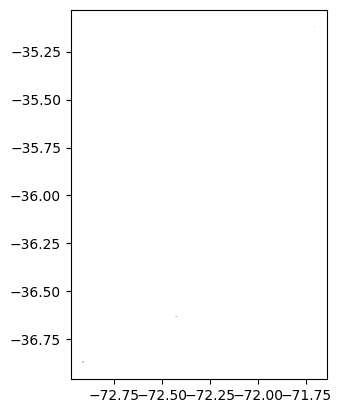

In [34]:
appended_gdf.plot()

In [ ]:
dnbr_func(224012590)
#224012343 224012590 224012643, 224012647

In [ ]:
df2

In [ ]:
#appended_gdf['color'] = appended_gdf['zone'].map(dNBR_col)
appended_gdf['dNBR_Desc'] = appended_gdf['zone'].map(dNBR_name)
appended_gdf.to_file('dNBRT2024.shp')

In [ ]:
appended_gdf.to_file('dNBRT2024.shp')

In [ ]:
appended_gdf.plot()

In [ ]:
for i in range(1,24):
    print(i)

In [ ]:
appended_gdf.query('ficha == "224010922"').plot()

In [ ]:
gdf2=gdf.iloc[[0]]
fc = geemap.geopandas_to_ee(gdf2)
gdf2

In [ ]:
df3=df2[df2['FICHA'].isin(gdf2['ficha'])]
df_inicio=df3['INICIO'].tolist()
df_control=df3['CONTROL'].tolist()
date_inicio2 = datetime.datetime.strptime(df_inicio[0], '%Y-%m-%d %H:%M:%S')
date_control1 = datetime.datetime.strptime(df_control[0], '%Y-%m-%d %H:%M:%S')
date_inicio1 = date_inicio2 - datetime.timedelta(days=60)
date_control2 = date_control1 + datetime.timedelta(days=20)
date_inicio1 = date_inicio1.strftime('%Y-%m-%d')
date_inicio2 = date_inicio2.strftime('%Y-%m-%d')
date_control1 = date_control1.strftime('%Y-%m-%d')
date_control2 = date_control2.strftime('%Y-%m-%d')
prefire_start = f'{date_inicio1}'
prefire_end = f'{date_inicio2}'

# Now set the same parameters for AFTER the fire.
postfire_start = f'{date_control1}'
#postfire_end = time.strftime('%Y-%m-%d', time.localtime(time.time()))
postfire_end = f'{date_control2}'

roi = fc

prefireImCol = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED') \
                  .filterDate(prefire_start, prefire_end) \
                  .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 20))\
                  .filterBounds(roi) \
                  .map(maskS2clouds)\
                  .map(addNBR)
                  
postfireImCol = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED') \
                  .filterDate(postfire_start, postfire_end) \
                  .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 20))\
                  .filterBounds(roi) \
                  .map(maskS2clouds)\
                  .map(addNBR)

#HARMONIZE
r20 = fc\
    .map(lambda f: f.buffer(50))\
    .union()

prefire = prefireImCol.mosaic().clip(r20)
postfire = postfireImCol.mosaic().clip(r20)

preNBR = prefire.select('nbr')
postNBR = postfire.select('nbr')
dNBR_withoutsmooth = preNBR.subtract(postNBR)
dNBR_unscaled = dNBR_withoutsmooth.reduceNeighborhood(
    reducer=ee.Reducer.mean(),
    kernel=ee.Kernel.gaussian(radius=5),
)
#dNBR_unscaled=dNBR_unscaled.clip(r20)
dNBR_reclass = dNBR_unscaled.gte(-0.5).add(dNBR_unscaled.gte(-0.25)).add(dNBR_unscaled.gte(-0.1)).add(dNBR_unscaled.gte(0.1)).add(dNBR_unscaled.gte(0.27)).add(dNBR_unscaled.gte(0.44)).add(dNBR_unscaled.gte(0.66))
#dNBR_Seguro = dNBR_unscaled.gte(0.27)

clip_fc= dNBR_reclass.clip(r20)

dNBR_vector= dNBR_reclass.reduceToVectors(**{
'geometry':r20,
'crs': 'EPSG:32718',
'scale':5,
'geometryType':'polygon',
'eightConnected': False,
'bestEffort':False,
'maxPixels':9e10,
'labelProperty': 'zone',
}
)
gdf2 = geemap.ee_to_geopandas(dNBR_vector, selectors=['id', 'name'])
gdf3=gdf2.dissolve('zone',aggfunc='max').reset_index()
# Define your color dictionary
dNBR_col = {
    0: "#ffffff",
    1: "#7a8737",
    2: "#acbe4d",
    3: "#0ae042",
    4: "#fff70b",
    5: "#ffaf38",
    6: "#ff641b",
    7: "#a41fd6"
}

# Create a new column 'color' mapped from 'zone' values to colors
gdf4=gdf3.copy()
gdf4['color'] = gdf4['zone'].map(dNBR_col)

gdf4.plot(color=gdf4['color'], legend=True)

In [ ]:
print(prefire_start, prefire_end, sep='  ') 

In [ ]:
gdf4['geometry']=gdf4.intersection(gdf.iloc[[0]].plot())

In [ ]:
gdf4['dNBR_Desc'] = gdf4['zone'].map(dNBR_name)

In [ ]:
gdf69=gdf.iloc[[0]]

In [ ]:

gdf5=gpd.clip(gdf4,gdf69)
gdf5.crs='EPSG:4326'


In [ ]:
gdf5.plot(color=gdf5['color'], legend=True)

In [ ]:
gdf3

In [ ]:
#countries = ee.FeatureCollection('users/raulperezastorga/Limites_SPPP')
#roi = countrie


In [ ]:
gdf5.crs='EPSG:4326'
gdf4.crs='EPSG:4326'
gdf4.to_file('incendios_dNBR_bf.shp')
gdf5.to_file('incendios_dNBR.shp')

In [ ]:
# firms = ee.ImageCollection('FIRMS')
# fires_firms = ee.ImageCollection(firms\
#         .select('T21')\
#         .filterDate(prefire_start,postfire_end)\
#         .filterBounds(roi)) 
# fires_firmsmx = fires_firms.max().clip(roi).subtract(273.15)
# fires_firmsrc = fires_firmsmx.gte(100)
# fires_firmsvc= fires_firmsrc.reduceToVectors(**{
#   'geometry':roi,
#   'crs': 'EPSG:32718',
#   'scale':500,
#   'geometryType':'polygon',
#   'eightConnected': False,
#   'bestEffort':False,
#   'maxPixels':9e10,
# }
#   )

# r20=ee.FeatureCollection(fires_firmsvc.toList(fires_firmsvc.size()))\
#     .filterMetadata('label', 'greater_than', 0)\
#     .filterMetadata('count', 'greater_than', 10)\
#     .map(lambda f: f.buffer(500))\
#     .union()\
#     .geometry()\
#     .simplify(50)




In [ ]:
Map = geemap.Map()
Map

In [ ]:
Map.addLayer(postfire,vizfalsoColor,"FalsoColor post")
Map.addLayer(dNBR_reclass, viz_dNBR, 'dNBR Clase')
Map.addLayer(fc, {}, "geopandas to ee")
#Map.addLayer(comp,vizfire,"FalsoColor fire")
Map.layers

In [ ]:
gdf3=gdf2.geometry.unary_union

In [ ]:
#import matplotlib.pyplot as plt
gdf2.plot(column='zone')

In [ ]:
gdf3

In [ ]:
# dNBR_vector= dNBR_reclass.reduceToVectors(**{
# 'geometry':r20,
# 'crs': 'EPSG:32718',
# 'scale':20,
# 'geometryType':'polygon',
# 'eightConnected': False,
# 'bestEffort':False,
# 'maxPixels':9e10,
# }
# )
# dNDBR_export=ee.FeatureCollection(dNBR_vector.toList(dNBR_vector.size()))\
#     .map(simplifyGeom)
# # Dissolve the simplified polygons and reduce file size
# dissolved_polygon_fc = dissolve_by_attribute(dNDBR_export, 'label')

#     #.filterMetadata('label', 'greater_than', 3)
# geemap.ee_export_vector_to_drive(
#     dissolved_polygon_fc, description=postfire_end+"_dNBR_500m", fileFormat='GeoJSON', folder="dNBR"
# )



In [ ]:
# def export_drive(i):
#   zona='{}'.format(i)
#   area = ee.FeatureCollection('projects/gl-for-gis-dsr/assets/OrganizationalFeatures/Limite_SPPP_1')\
#       .filter(ee.Filter.equals("idzona", int(zona)))
#   dNBR_vector= dNBR_reclass.reduceToVectors(**{
#     'geometry':area,
#     'crs': 'EPSG:32718',
#     'scale':30,
#     'geometryType':'polygon',
#     'eightConnected': False,
#     'bestEffort':False,
#     'maxPixels':9e10,
#   }
#     )
#   dNDBR_export=ee.FeatureCollection(dNBR_vector.toList(dNBR_vector.size()))
#   geemap.ee_export_vector_to_drive(
#       dNBR_vector, description=postfire_end+"_dNBR_" + zona, fileFormat='GeoJSON', folder="dNBR"
#  )

In [ ]:
# export_drive(4)

In [ ]:
# for i in zona:
#     export_drive(i)

In [ ]:
# dNBR_vector= dNBR_reclass.reduceToVectors(**{
# 'geometry':r20,
# 'crs': 'EPSG:32718',
# 'scale':30,
# 'geometryType':'polygon',
# 'eightConnected': False,
# 'bestEffort':False,
# 'maxPixels':9e10,
# }
# )
# dNDBR_export=ee.FeatureCollection(dNBR_vector.toList(dNBR_vector.size()))\
#     .filterMetadata('label', 'greater_than', 3)
# geemap.ee_export_vector_to_cloud_storage(
#     dNDBR_export, description=postfire_end+"_dNBR", fileFormat='csv',bucket='ee_geomatica'
# )

# def export_bucket(i):
#     sppp='{}'.format(i)
#     area = roi\
#         .filter(ee.Filter.equals("PaisajeID", int(sppp)))
#     dNBR_vector= dNBR_reclass.reduceToVectors(**{
#     'geometry':area,
#     'crs': 'EPSG:32718',
#     'scale':20,
#     'geometryType':'polygon',
#     'eightConnected': False,
#     'bestEffort':False,
#     'maxPixels':9e10,
#     }
#     )
#     dNDBR_export=ee.FeatureCollection(dNBR_vector.toList(dNBR_vector.size()))
#     geemap.ee_export_vector_to_cloud_storage(
#         dNBR_vector, description=postfire_end+"_dNBR_" + str(sppp), fileFormat='SHP',bucket='bck-gl-for-gis-dsr-tfstate/EE_prueba/02_dNBR_vector'
#     )

In [ ]:
# ppp=list(range(21,23))
# for i in ppp:
#     export_drive(i)

In [ ]:
#geemap.ee_search()